### Nama/NIM
Alvin Christopher Santausa/19623129\
Anthony Alden Satriabudi/16523185\
Kiyo Lee Tiono/16523003\
Vico A C Silalahi/16523157

### Deskripsi: Data Analysis Pendapatan Turnamen Esport

Data diambil dari: \
https://www.kaggle.com/datasets/rankirsh/esports-earnings/data

Data berbentuk CSV (Comma Separated Values), dengan 2 buah file CSV. Attribute ada 12 jika ditotal sebelum digabung.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm
import numpy as np
import seaborn as sns
import squarify

In [3]:
hdf = pd.read_csv('dataset/HistoricalEsportData.csv')
gdf= pd.read_csv('dataset/GeneralEsportData.csv')

In [4]:
print(hdf.info())
print(gdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9244 non-null   object 
 1   Game         9244 non-null   object 
 2   Earnings     9244 non-null   float64
 3   Players      9244 non-null   int64  
 4   Tournaments  9244 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 361.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              650 non-null    object 
 1   ReleaseDate       650 non-null    int64  
 2   Genre             650 non-null    object 
 3   TotalEarnings     650 non-null    float64
 4   OfflineEarnings   650 non-null    float64
 5   PercentOffline    583 non-null    float64
 6   TotalPlayers      650 non-null    int64  
 7  

In [5]:
print(gdf.isnull().sum())
print(hdf.isnull().sum())

Game                 0
ReleaseDate          0
Genre                0
TotalEarnings        0
OfflineEarnings      0
PercentOffline      67
TotalPlayers         0
TotalTournaments     0
dtype: int64
Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64


In [6]:
gdf = gdf.dropna()

In [7]:
gdf = gdf.drop(gdf[gdf["TotalPlayers"] == 0].index)
gdf.loc[gdf["TotalPlayers"] == 0].value_counts()

Series([], Name: count, dtype: int64)

In [8]:
hdf = hdf.drop(hdf[hdf["Players"] == 0].index)
gdf.loc[gdf["TotalPlayers"] == 0].value_counts()

Series([], Name: count, dtype: int64)

In [9]:
hdf.isnull().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
dtype: int64

In [10]:
print(hdf.head())
print(gdf.head())

         Date                          Game  Earnings  Players  Tournaments
0  1998-01-01  Command & Conquer: Red Alert   15000.0        8            1
1  1998-01-01                    QuakeWorld   15000.0        8            1
2  1998-05-01                      Quake II   15000.0        4            1
3  1998-05-01            Total Annihilation   15000.0        2            1
4  1998-05-01                    QuakeWorld     300.0        3            1
                    Game  ReleaseDate     Genre  TotalEarnings  \
0         Age of Empires         1997  Strategy      510716.46   
1      Age of Empires II         1999  Strategy     3253232.59   
2     Age of Empires III         2005  Strategy      115843.65   
3      Age of Empires IV         2021  Strategy      994675.03   
4  Age of Empires Online         2011  Strategy        9806.56   

   OfflineEarnings  PercentOffline  TotalPlayers  TotalTournaments  
0        375857.63        0.735942           473               265  
1       1

In [11]:
print(hdf.info())
print(gdf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9242
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9070 non-null   object 
 1   Game         9070 non-null   object 
 2   Earnings     9070 non-null   float64
 3   Players      9070 non-null   int64  
 4   Tournaments  9070 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 425.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              566 non-null    object 
 1   ReleaseDate       566 non-null    int64  
 2   Genre             566 non-null    object 
 3   TotalEarnings     566 non-null    float64
 4   OfflineEarnings   566 non-null    float64
 5   PercentOffline    566 non-null    float64
 6   TotalPlayers      566 non-null    int64  
 7   TotalTour

## Penjelasan Karakteristik Data
### HistoricalEsportData.csv - hdf
Date: Tanggal turnamen berlangsung | Quantitative-Discrete\
Game: Nama game yang dimainkan dalam turnamen tersebut | Categorical-Nominal\
Earnings: Total hadiah dari turnamen tersebut | Quantitative-Continues\
Players: Jumlah pemain yang bermain di turnamen tersebut | Quantitative-Discrete\
Tournament: Jumlah turnamen yang berlangsung pada tanggal tersebut sekaligus | Quantitative-Discrete\

### GeneralEsportData.csv - gdf
Game: Nama game | Categorical-Nominal\
ReleaseDate: Tahun game tersebut dirilis | Quantitative-Discrete\
Genre: Genre game | Categorical-Nominal\
TotalEarnings: Total hadiah dari semua turnamen game tersebut | Quantitative-Continues\
OfflineEarnings: Total hadiah dari semua turnamen offline game tersebut | Quantitative-Continues\
PercentOffline: Berapa persen turnamen game tersebut berlangsung secara offline | Quantitative-Continues\
TotalPlayers: Jumlah pemain yang pernah bertanding di turnamen game tersebut | Quantiative-Discrete\
TotalTournaments: Jumlah turnamen yang pernah berlangsung | Quantitative-Discrete

In [12]:
print(gdf.info())
print(hdf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              566 non-null    object 
 1   ReleaseDate       566 non-null    int64  
 2   Genre             566 non-null    object 
 3   TotalEarnings     566 non-null    float64
 4   OfflineEarnings   566 non-null    float64
 5   PercentOffline    566 non-null    float64
 6   TotalPlayers      566 non-null    int64  
 7   TotalTournaments  566 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 39.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9242
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9070 non-null   object 
 1   Game         9070 non-null   object 
 2   Earnings     9070 non-null   float64
 3   Players      9070 non-null   int64  
 4   Tourn

In [13]:
hdf_g = pd.merge(hdf, gdf[['Game', 'Genre']], on='Game', how='left')
# Memberikan kolom Genre pada dataframe Historical, sehingga lebih mudah untuk dianalisis

In [14]:
hdf_g.head()

,Date,Game,Earnings,Players,Tournaments,Genre
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1,Strategy
1,1998-01-01,QuakeWorld,15000.0,8,1,First-Person Shooter
2,1998-05-01,Quake II,15000.0,4,1,First-Person Shooter
3,1998-05-01,Total Annihilation,15000.0,2,1,Strategy
4,1998-05-01,QuakeWorld,300.0,3,1,First-Person Shooter


In [15]:
hdf_g['Date'] = pd.to_datetime(hdf_g['Date'])

# Extract the year from the 'Date' column
hdf_g['Year'] = hdf_g['Date'].dt.year

## Statistik

In [16]:
print(f"Rata-rata Total earnings : {gdf['TotalEarnings'].mean()}")
print(f"Rata-rata Offline Earnings : {gdf['OfflineEarnings'].mean()}")
print(f"Rata-rata percent offline : {gdf['PercentOffline'].mean()*100}%" )
print(f"Rata-rata Total pemain : {gdf['TotalPlayers'].mean()}")
print(f"Rata-rata Total Tournamen : {gdf['TotalTournaments'].mean()}")
print(f"Standar Deviasi Total earnings : {gdf['TotalEarnings'].std()}")
print(f"Standar Deviasi Offline Earnings : {gdf['OfflineEarnings'].std()}")
print(f"Standar Deviasi percent offline : {gdf['PercentOffline'].std()*100}" )
print(f"Standar Deviasi Total pemain : {gdf['TotalPlayers'].std()}")
print(f"Standar Deviasi Total Tournamen : {gdf['TotalTournaments'].std()}")

Rata-rata Total earnings : 2901660.9357243814
Rata-rata Offline Earnings : 2037193.474081272
Rata-rata percent offline : 65.24410575019502%
Rata-rata Total pemain : 259.9840989399293
Rata-rata Total Tournamen : 107.90459363957598
Standar Deviasi Total earnings : 18814616.214220814
Standar Deviasi Offline Earnings : 14741369.930707084
Standar Deviasi percent offline : 41.27727419664771
Standar Deviasi Total pemain : 1029.3413607326047
Standar Deviasi Total Tournamen : 512.7954392961504


In [17]:
print(f"Rata-rata Earnings : {hdf['Earnings'].mean()}")
print(f"Rata-rata Players : {hdf['Players'].mean()}")
print(f"Rata-rata Tournaments dalam 1 hari : {hdf['Tournaments'].mean()}" )
print(f"Standar Deviasi Earnings : {hdf['Earnings'].std()}")
print(f"Standar Deviasi Banyak pemain dalam 1 hari: {hdf['Players'].std()}")
print(f"Standar Deviasi Tournaments dalam 1 hari: {hdf['Tournaments'].std()}" )

Rata-rata Earnings : 182898.7027783903
Rata-rata Players : 60.86758544652701
Rata-rata Tournaments dalam 1 hari : 6.738368246968027
Standar Deviasi Earnings : 1026658.3012231138
Standar Deviasi Banyak pemain dalam 1 hari: 131.07489404852265
Standar Deviasi Tournaments dalam 1 hari: 12.189910072710779


# Mencari Nilai Percentile

In [61]:
hdf.name = 'hdf'
gdf.name = 'gdf'
def findPercentile(dataframe, columnName):
    print(f"{dataframe.name}['{columnName}']")
    print(f"10% Percentile :{dataframe[columnName].quantile(0.1)}")
    print(f"25% Percentile :{dataframe[columnName].quantile(0.25)}")
    print(f"50% Percentile :{dataframe[columnName].quantile(0.5)}")
    print(f"75% Percentile :{dataframe[columnName].quantile(0.75)}")
    print(f"90% Percentile :{dataframe[columnName].quantile(0.9)}")
    print()

In [62]:
findPercentile(hdf, "Earnings")
findPercentile(hdf, "Players")
findPercentile(hdf, "Tournaments")

hdf['Earnings']
10% Percentile :235.0
25% Percentile :1066.2425
50% Percentile :10673.93
75% Percentile :74395.45000000001
90% Percentile :350611.1140000003

hdf['Players']
10% Percentile :3.0
25% Percentile :6.0
50% Percentile :17.0
75% Percentile :52.0
90% Percentile :150.0

hdf['Tournaments']
10% Percentile :1.0
25% Percentile :1.0
50% Percentile :2.0
75% Percentile :6.0
90% Percentile :16.0



In [63]:
findPercentile(gdf, "ReleaseDate")
findPercentile(gdf, "TotalEarnings")
findPercentile(gdf, "OfflineEarnings")
findPercentile(gdf, "PercentOffline")

gdf['ReleaseDate']
10% Percentile :2001.5
25% Percentile :2007.0
50% Percentile :2015.0
75% Percentile :2018.75
90% Percentile :2020.0

gdf['TotalEarnings']
10% Percentile :345.0
25% Percentile :4934.0775
50% Percentile :54203.81
75% Percentile :466135.7425
90% Percentile :3177897.91

gdf['OfflineEarnings']
10% Percentile :0.0
25% Percentile :212.1875
50% Percentile :31200.0
75% Percentile :259897.0575
90% Percentile :2218712.01

gdf['PercentOffline']
10% Percentile :0.0
25% Percentile :0.15987738530928175
50% Percentile :0.892423618857527
75% Percentile :1.0
90% Percentile :1.0



In [64]:
findPercentile(gdf, "TotalPlayers")
findPercentile(gdf, "TotalTournaments")

gdf['TotalPlayers']
10% Percentile :3.0
25% Percentile :8.0
50% Percentile :35.0
75% Percentile :123.75
90% Percentile :417.5

gdf['TotalTournaments']
10% Percentile :1.0
25% Percentile :2.0
50% Percentile :8.0
75% Percentile :38.75
90% Percentile :152.5



# Mencari Range

In [19]:
nilai_max=hdf["Earnings"].max()
nilai_min=hdf["Earnings"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

40138651.26 0.0 40138651.26


In [20]:
nilai_max=hdf["Players"].max()
nilai_min=hdf["Players"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

1719 1 1718


In [21]:
nilai_max=hdf["Tournaments"].max()
nilai_min=hdf["Tournaments"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

172 1 171


In [22]:
nilai_max=gdf["ReleaseDate"].max()
nilai_min=gdf["ReleaseDate"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

2023 1985 38


In [23]:
nilai_max=gdf["TotalEarnings"].max()
nilai_min=gdf["TotalEarnings"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

337107974.16 10.0 337107964.16


In [24]:
nilai_max=gdf["OfflineEarnings"].max()
nilai_min=gdf["OfflineEarnings"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

298290573.89 0.0 298290573.89


In [25]:
nilai_max=gdf["PercentOffline"].max()
nilai_min=gdf["PercentOffline"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

1.0 0.0 1.0


In [26]:
nilai_max=gdf["TotalPlayers"].max()
nilai_min=gdf["TotalPlayers"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

16272 1 16271


In [27]:
nilai_max=gdf["TotalTournaments"].max()
nilai_min=gdf["TotalTournaments"].min()
range=nilai_max-nilai_min
print(f"{nilai_max} {nilai_min} {range}")

7245 1 7244


In [28]:
hdf['Date'] = pd.to_datetime(hdf['Date'])

# Mencari nilai minimum dan maksimum dari kolom 'Date'
tanggal_min = hdf['Date'].min()
tanggal_max = hdf['Date'].max()
range = tanggal_max-tanggal_min
print(f"{tanggal_max} {tanggal_min} {range}")

2023-10-01 00:00:00 1998-01-01 00:00:00 9404 days 00:00:00


# Mencari Banyak Nilai Unik

In [29]:
print(gdf['Genre'].unique())
print(gdf['Genre'].nunique())

['Strategy' 'First-Person Shooter' 'Multiplayer Online Battle Arena'
 'Role-Playing Game' 'Fighting Game' 'Racing' 'Sports'
 'Collectible Card Game' 'Puzzle Game' 'Battle Royale'
 'Third-Person Shooter' 'Music / Rhythm Game']
12


In [30]:
gdf['Game'].nunique()

566

In [31]:
gdf['Game'].isnull().sum()

0

# Visualisasi

In [32]:
hdf_g['Date'] = pd.to_datetime(hdf_g['Date'])

# Extract the year from the 'Date' column
hdf_g['Year'] = hdf_g['Date'].dt.year

hdfbersih = hdf_g[hdf_g[["Earnings","Players"]].notnull().all(1)]
hdfbersih[["Earnings","Players"]] = hdfbersih[["Earnings","Players"]].abs()

gdfbersih = gdf[gdf[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]].notnull().all(1)]
gdfbersih[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]] = gdfbersih[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]].abs()

# Perbandingan Kategori

<Axes: title={'center': 'Grafik banyaknya game berdasarkan genre'}, xlabel='Genre', ylabel='Jumlah Game'>

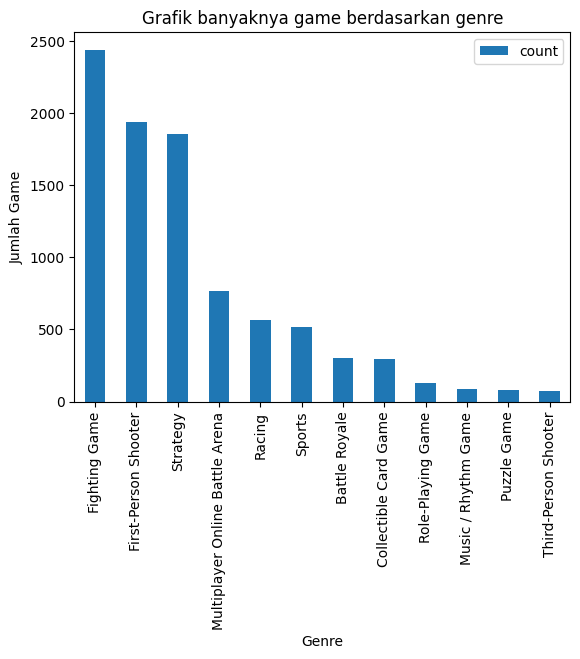

In [33]:
df1 = hdfbersih.groupby(['Genre', 'Game'])['Game'].value_counts()
df01= hdfbersih["Game"].value_counts()
genre_counts = hdfbersih['Genre'].value_counts().reset_index()
genre_counts.plot(kind="bar", x="Genre", title="Grafik banyaknya game berdasarkan genre", xlabel="Genre", ylabel="Jumlah Game")

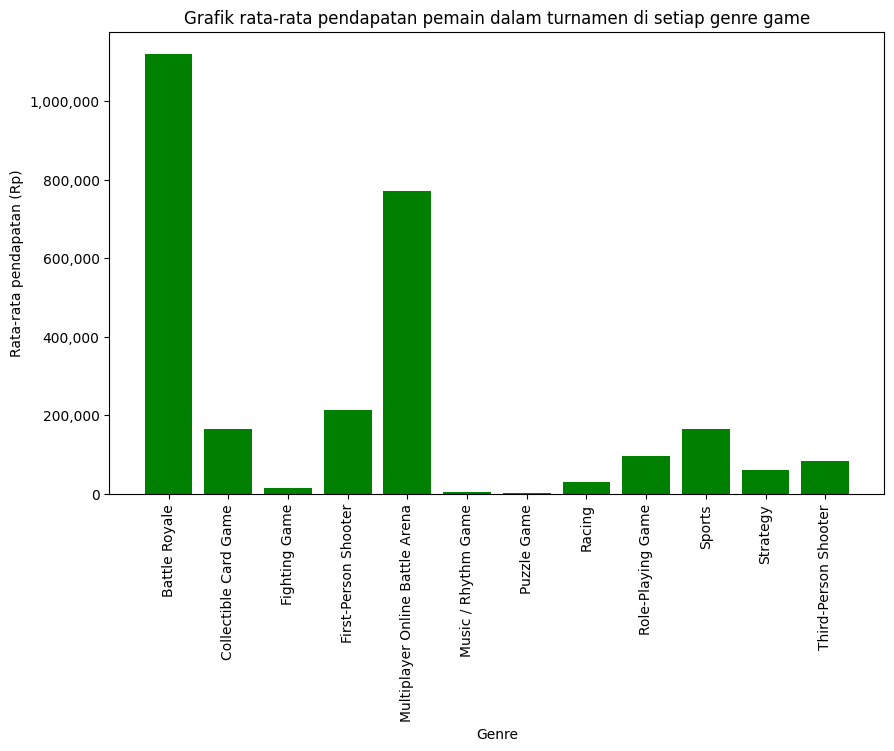

In [34]:
df02 = hdfbersih.groupby("Genre")["Earnings"].mean()
pd.set_option('display.float_format', '{:.0f}'.format)

def format_ticks(value, _):
    return '{:,.0f}'.format(value)

plt.figure(figsize=(10, 6))
plt.bar(df02.index, df02, color='green')
plt.title('Grafik rata-rata pendapatan pemain dalam turnamen di setiap genre game')
plt.xlabel('Genre')
plt.ylabel('Rata-rata pendapatan (Rp)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Penampilan perubahan terhadap waktu

In [35]:
hdf_g['Date'] = pd.to_datetime(hdf_g['Date'])

# Extract the year from the 'Date' column
hdf_g['Year'] = hdf_g['Date'].dt.year

df2 = hdf_g.groupby(["Year"])["Tournaments"].size()

grouped_data = hdf_g.groupby('Year')['Tournaments'].sum().reset_index()
print(hdf_g)

           Date                          Game  Earnings  Players  Tournaments  \
0    1998-01-01  Command & Conquer: Red Alert     15000        8            1   
1    1998-01-01                    QuakeWorld     15000        8            1   
2    1998-05-01                      Quake II     15000        4            1   
3    1998-05-01            Total Annihilation     15000        2            1   
4    1998-05-01                    QuakeWorld       300        3            1   
...         ...                           ...       ...      ...          ...   
9065 2023-10-01               Team Fortress 2      5000       21            1   
9066 2023-10-01                          osu!      1228        6            2   
9067 2023-10-01             Trackmania (2020)       874       11            3   
9068 2023-10-01                Age of Empires       615        8            1   
9069 2023-10-01             Age of Empires II       490       12            3   

                     Genre 

<Axes: title={'center': 'Grafik banyaknya tournamen dari tahun ke tahun'}, xlabel='Tahun', ylabel='Banyaknya Tournamen'>

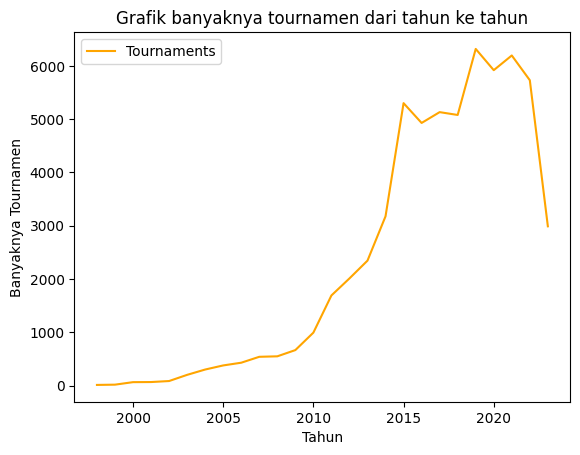

In [36]:
grouped_data.plot(kind="line", color="orange",x="Year", y="Tournaments", xlabel="Tahun", ylabel="Banyaknya Tournamen" ,title="Grafik banyaknya tournamen dari tahun ke tahun")

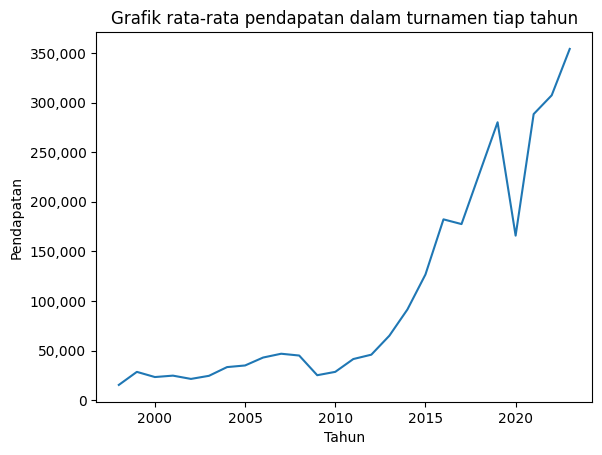

In [37]:
df3 = hdfbersih.groupby("Year")["Earnings"].mean()
pd.set_option('display.float_format', '{:.0f}'.format)

ax = df3.plot(kind="line", stacked=True, title="Grafik rata-rata pendapatan dalam turnamen tiap tahun", xlabel="Tahun", ylabel="Pendapatan dalam turnamen (Rp)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Tahun')
plt.ylabel('Pendapatan')

# Menampilkan plot
plt.show()

# Penampilan Hierarki dan Hubungan Keseluruhan-bagian

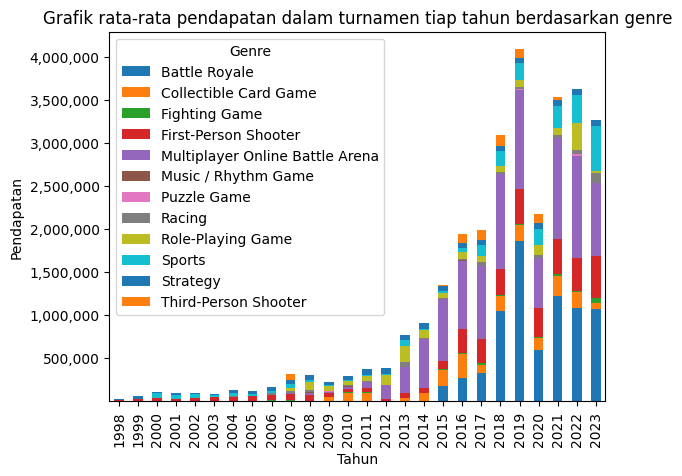

In [38]:
df3 = hdfbersih.groupby(["Year", "Genre"])["Earnings"].mean().unstack()
pd.set_option('display.float_format', '{:.0f}'.format)

ax = df3.plot(kind="bar", stacked=True, title="Grafik rata-rata pendapatan dalam turnamen tiap tahun berdasarkan genre", xlabel="Tahun", ylabel="Pendapatan dalam turnamen (Rp)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Tahun')
plt.ylabel('Pendapatan')

# Menampilkan plot
plt.show()

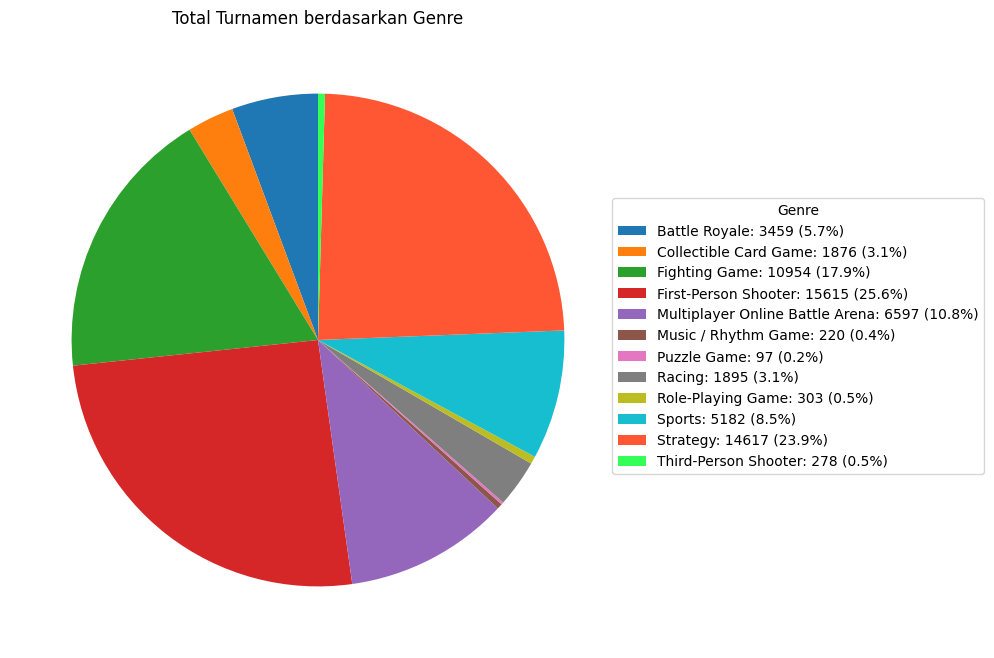

In [39]:
df04 = hdfbersih.groupby("Genre")["Tournaments"].sum().reset_index()
custom_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#FF5733", "#33FF57"
]

fig, ax = plt.subplots(figsize=(10, 8))

wedges, _, autotexts = ax.pie(df04['Tournaments'], labels=None, autopct='', startangle=90, colors=custom_colors, pctdistance=0.75)


ax.legend(wedges, [f'{genre}: {tournaments} ({percentage:.1f}%)' for genre, tournaments, percentage in zip(df04['Genre'], df04['Tournaments'], df04['Tournaments'] / df04['Tournaments'].sum() * 100)],
          title='Genre', bbox_to_anchor=(0.8, 0.5), loc="center left", bbox_transform=plt.gcf().transFigure)

ax.set_title("Total Turnamen berdasarkan Genre")

plt.show()

# Plotting Relationships

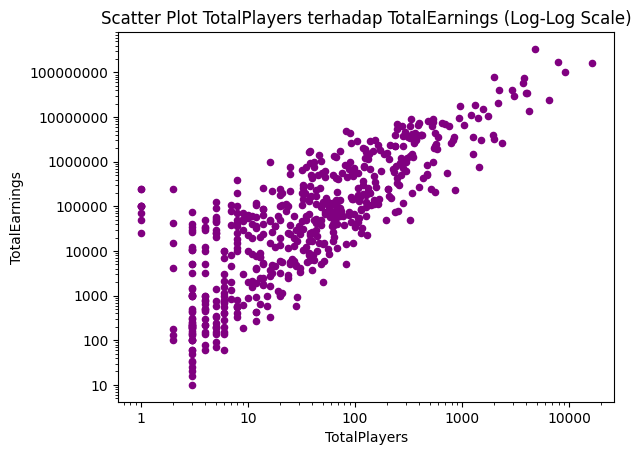

In [40]:
gdfbersih.plot(kind="scatter", x="TotalPlayers", y="TotalEarnings", loglog=True, color='purple')

def format_ticks(x, _):
    return f"{x:.0f}"

plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_ticks))
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.title('Scatter Plot TotalPlayers terhadap TotalEarnings (Log-Log Scale)')
plt.xlabel('TotalPlayers')
plt.ylabel('TotalEarnings')
plt.show()

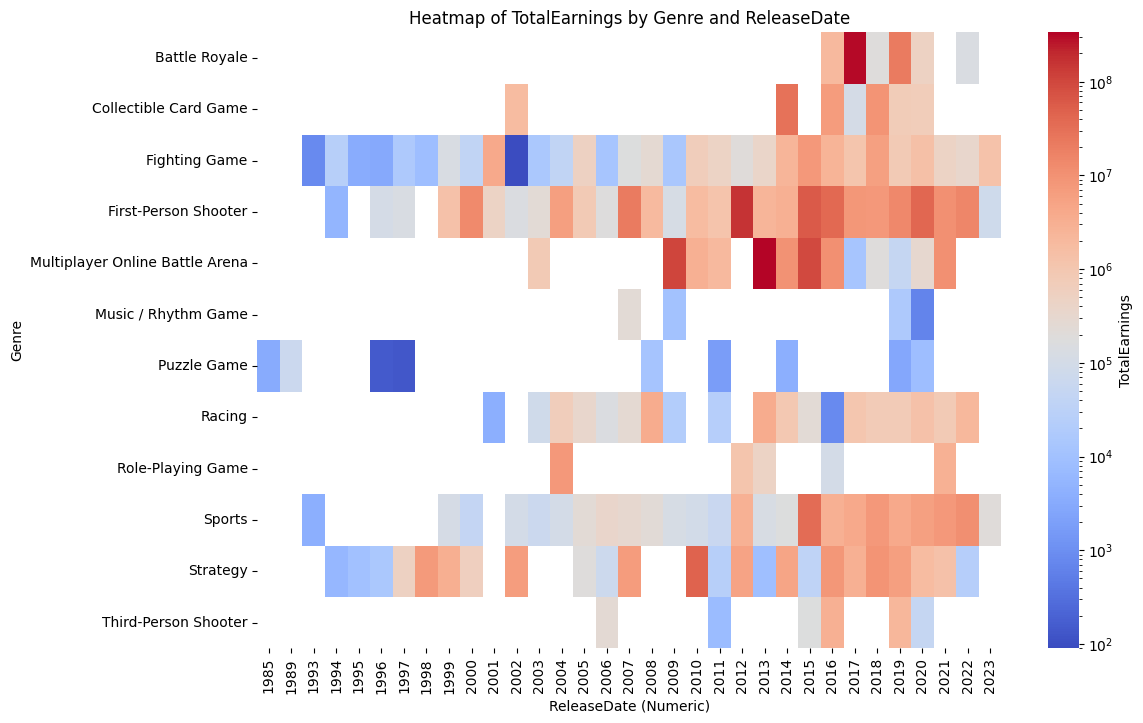

In [41]:
heatmap_data = gdf.pivot_table(values='TotalEarnings', index='Genre', columns='ReleaseDate', aggfunc='sum', fill_value=0)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cbar_kws={'label': 'TotalEarnings'}, cmap='coolwarm', norm='log')
plt.title('Heatmap of TotalEarnings by Genre and ReleaseDate')
plt.xlabel('ReleaseDate (Numeric)')
plt.ylabel('Genre')
plt.show()

<Axes: >

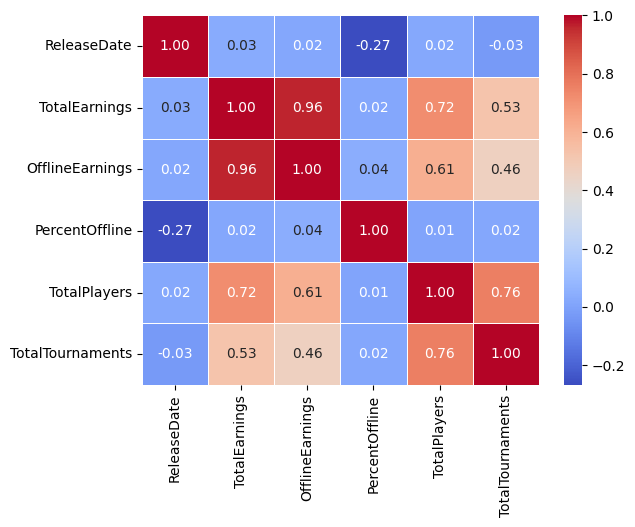

In [42]:
numerical_columns = gdf.select_dtypes(include=['float64', 'int64']).columns

sns.heatmap(gdf[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

<Axes: >

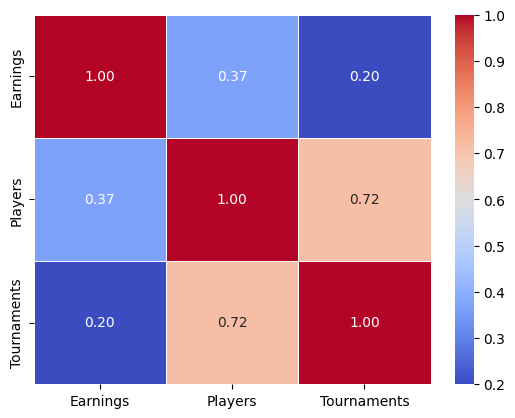

In [43]:
numerical_columns = hdf_g.select_dtypes(include=['float64', 'int64']).columns

sns.heatmap(hdf_g[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)